# Floyd Warshall Algorithm
## Algorithm
1. **Outer Loop:** For each intermediate node `i` from `0` to `n-1` (where `n` is the number of nodes).
2. **Source Loop:** For each possible source node from `0` to `n-1`:
    - Skip if source node equals intermediate node (`source == i`).
3. **Destination Loop:** For each possible destination node from `0` to `n-1`:
    - Skip if destination node equals intermediate node (`dest == i`).
    - Skip if source node equals destination node (`source == dest`).
4. **Relaxation:** For remaining source and destination nodes:
    - Calculate a new distance: `dist = graph[source][i] + graph[i][dest]`.
    - If this newly calculated `dist` is less than the current value `graph[source][dest]`, update it: `graph[source][dest] = dist`.
5. **Repeat:** Steps 1-4 for every possible intermediate node.
***
**Note:** Unlike Bellman Ford and Dijkstra's algorithms (single-source shortest path), Floyd-Warshall is used to find the shortest path from all the nodes to every node (many-to-many).
***
## Initializing the graph

In [1]:
VERY_LARGE_NUMBER = 10 ** 6
graph = [
    [0, 4, VERY_LARGE_NUMBER, 5, VERY_LARGE_NUMBER],
    [VERY_LARGE_NUMBER, 0, 1,  VERY_LARGE_NUMBER, 6],
    [2, VERY_LARGE_NUMBER, 0, 3, VERY_LARGE_NUMBER],
    [VERY_LARGE_NUMBER, VERY_LARGE_NUMBER, 1, 0, 2],
    [1, VERY_LARGE_NUMBER, VERY_LARGE_NUMBER, 4, 0]
]

## Visualizing the graph

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjacency_matrix = [], isDirected = False, useAlphabets = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjacency_matrix) > 0:
            for i in range(len(adjacency_matrix)):
                for j in range(len(adjacency_matrix[i])):
                    if adjacency_matrix[i][j] <= 0 or adjacency_matrix[i][j] == VERY_LARGE_NUMBER: continue
                    if useAlphabets:
                        self.G.add_edge(chr(i+97), chr(j+97), weight = adjacency_matrix[i][j])
                    else: self.G.add_edge(i, j, weight = adjacency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

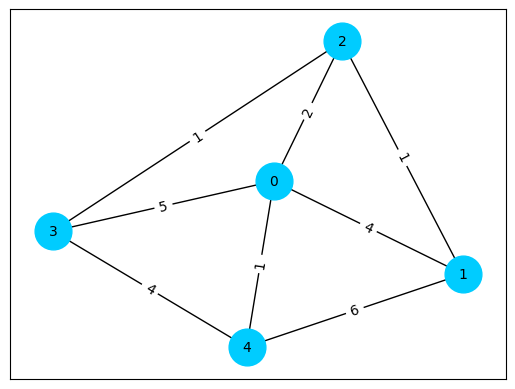

In [3]:
G = GraphVisualization(weighted = True, isDirected = False, adjacency_matrix = graph, useAlphabets = False)
G.visualize()

***
## Implementing the algorithm

In [4]:
from typing import List

class FloydWarshall:
    def __init__(self, graph_: List[List[int]]):
        self.graph = graph_  # assuming the graph doesn't change, we create a shallow copy

    def edge_relaxation(self):
        # relaxing the edges
        for i in range(len(self.graph)):
            for source in range(len(self.graph)):
                if source == i:
                    continue
                for dest in range(len(self.graph)):
                    if dest == i:
                        continue
                    if source == dest:
                        continue
                    dist = self.graph[source][i] + self.graph[i][dest]
                    if dist < self.graph[source][dest]:
                        self.graph[source][dest] = dist
        return self.graph

## Driver code

In [5]:
f = FloydWarshall(graph)
f.edge_relaxation()

[[0, 4, 5, 5, 7],
 [3, 0, 1, 4, 6],
 [2, 6, 0, 3, 5],
 [3, 7, 1, 0, 2],
 [1, 5, 5, 4, 0]]

***